# Влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике

In [1555]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

## Первичный отсмотр данных

In [1556]:
stud.info()
stud.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


## Первичный анализ данных

In [1557]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [1558]:
stud.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']

In [1559]:
stud.loc[:, ['school']].info()
pd.DataFrame(stud.school.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,school
GP,349
MS,46


Два уникальных значения. Ошибок нет, Нулевых строк нет

In [1560]:
stud.loc[:, ['sex']].info()
pd.DataFrame(stud.sex.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,sex
F,208
M,187


Два уникальных значения. Ошибок нет, Нулевых строк нет

In [1561]:
stud.loc[:, ['age']].info()
pd.DataFrame(stud.age.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

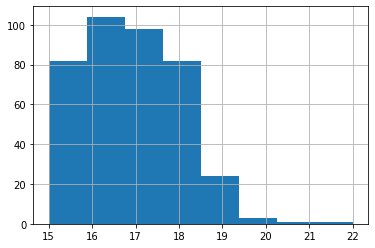

In [1562]:
stud.age.hist(bins = 8)
stud.age.describe()

8 уникальных значений. Ошибок, выбросов нет. Нулевых строк нет.
Как можно увидеть 20, 21, 22 летних меньше 10 человек, слишком маленькое количество, что бы понять зависимость успеваемости от влияния возраста для этих учеников. Это могут быть выбросы, а не характероные случаи. Поэтому их лучше отбросить

In [1563]:
stud = stud.loc[stud.age <= 19]

count    390.000000
mean      16.646154
std        1.201081
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       19.000000
Name: age, dtype: float64

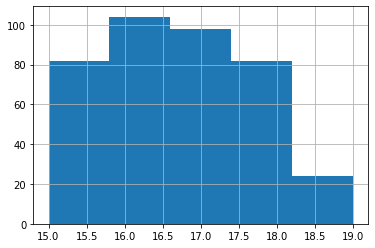

In [1564]:
stud.age.hist(bins = 5)
stud.age.describe()

После корректировки 5 уникальных значений. Ошибок нет. Нулевых строк нет

In [1565]:
stud.loc[:, ['address']].info()
pd.DataFrame(stud.address.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  374 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


,address
U,292
R,82


2 уникальных значения. Ошибок нет, 16 нулевых строк

In [1566]:
stud.loc[:, ['famsize']].info()
pd.DataFrame(stud.famsize.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  363 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


,famsize
GT3,257
LE3,106


2 уникальных значения. Ошибок нет. 27 нулевых строк

In [1567]:
stud.loc[:, ['pstatus']].info()
pd.DataFrame(stud.pstatus.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  345 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


,pstatus
T,311
A,34


2 уникальных значения. Ошибок, выбросов нет. 45 нулевых строк

In [1568]:
stud.loc[:, ['medu']].info()
pd.DataFrame(stud.medu.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    387 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


,medu
4.0,130
2.0,101
3.0,95
1.0,58
0.0,3


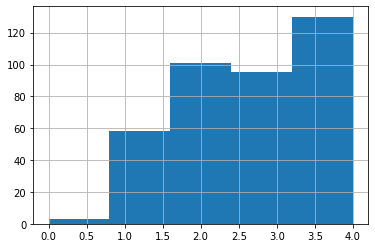

In [1569]:
stud.medu.hist(bins = 5)

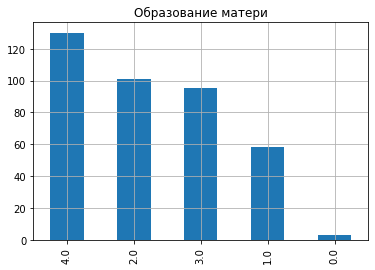

In [1570]:
stud.medu.value_counts().plot(kind = 'bar', 
                              grid = True, 
                              title = 'Образование матери')

In [1571]:
#Переименуем значения и сменим их тип, так как это не колличественная переменная
stud.medu = stud.medu.apply(lambda x: 'not education' if x == 0 else '1-4 class' if x == 1 
                      else '5-9 class' if x == 2 else 'secondary education' if x == 3 else 'higher education' if x == 4 else None)
stud.loc[:, ['medu']].info()
pd.DataFrame(stud.medu.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   medu    387 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


,medu
higher education,130
5-9 class,101
secondary education,95
1-4 class,58
not education,3


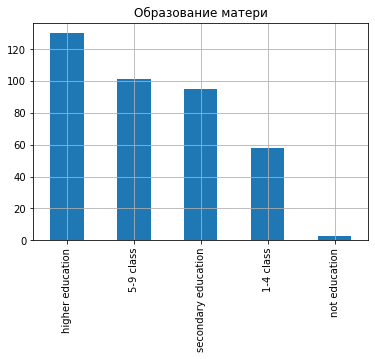

In [1572]:
stud.medu.value_counts().plot(kind = 'bar', 
                              grid = True, 
                              title = 'Образование матери')

5 уникальных значений. Ошибок, выбросов нет. 3 нулевые строки. Самое часто встречающийся параметр: 4 - высшее образование у матери

In [1573]:
stud.loc[:, ['fedu']].info()
pd.DataFrame(stud.fedu.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    366 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


,fedu
2.0,103
3.0,96
4.0,88
1.0,76
0.0,2
40.0,1


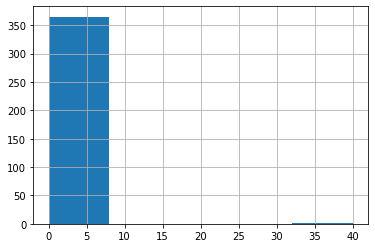

In [1574]:
stud.fedu.hist(bins = 5)

6 уникальных значений. Есть выброс, скорее всего ошибка. Можно или удалить строку с ошибкой или удалить только ошибку. Лучше удалить всю строку, так как строка может содержать другие ошибки

In [1577]:
stud.drop(stud[stud.fedu > 5].index, inplace = True)

In [1578]:
stud.loc[:, ['fedu']].info()
pd.DataFrame(stud.fedu.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    365 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


,fedu
2.0,103
3.0,96
4.0,88
1.0,76
0.0,2


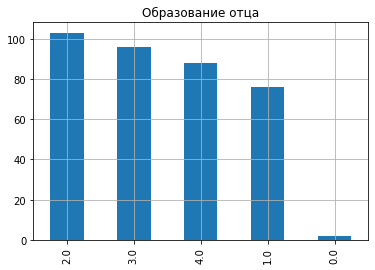

In [1579]:
stud.fedu.value_counts().plot(kind = 'bar', 
                              grid = True, 
                              title = 'Образование отца')

In [1580]:
#Переименуем значения и сменим их тип, так как это не колличественная переменная
stud.fedu = stud.fedu.apply(lambda x: 'not education' if x == 0 else '1-4 class' if x == 1 
                      else '5-9 class' if x == 2 else 'secondary education' if x == 3 else 'higher education' if x == 4 else None)
stud.loc[:, ['fedu']].info()
pd.DataFrame(stud.fedu.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fedu    365 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


,fedu
5-9 class,103
secondary education,96
higher education,88
1-4 class,76
not education,2


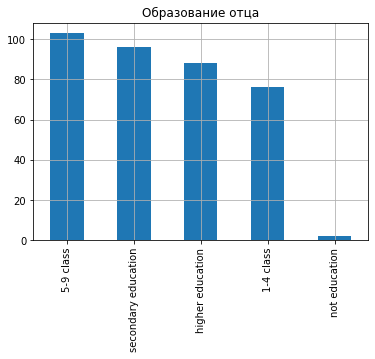

In [1581]:
stud.fedu.value_counts().plot(kind = 'bar', 
                              grid = True, 
                              title = 'Образование отца')

5 уникальных значений. Ошибок, выбросов нет. 24 нулевые строки. Самое часто встречающийся параметр: 2 - 2 - 5-9 классов образования у отца

In [1582]:
stud.loc[:, ['mjob']].info()
pd.DataFrame(stud.mjob.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    370 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


,mjob
other,132
services,94
at_home,58
teacher,55
health,31


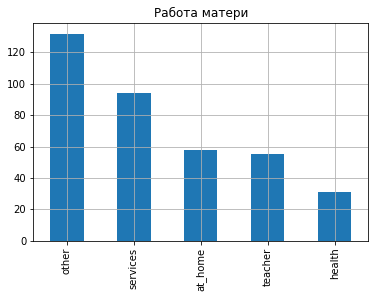

In [1583]:
stud.mjob.value_counts().plot(kind = 'bar', 
                              grid = True, 
                              title = 'Работа матери')

5 уникальных значений. Ошибок, выбросов нет. 19 нулевых строк. Самый часто встречающийся параметр: другое у матери

In [1584]:
stud.loc[:, ['fjob']].info()
pd.DataFrame(stud.fjob.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    353 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


,fjob
other,193
services,100
teacher,29
at_home,16
health,15


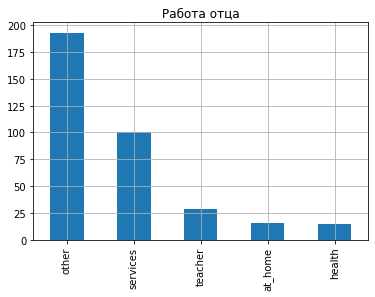

In [1585]:
stud.fjob.value_counts().plot(kind = 'bar', 
                              grid = True, 
                              title = 'Работа отца')

In [1586]:
stud.loc[:, ['fjob']].info()
pd.DataFrame(stud.fjob.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    353 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


,fjob
other,193
services,100
teacher,29
at_home,16
health,15


5 уникальных значений. Ошибок, выбросов нет. 36 нулевых строк. Самый часто встречающийся параметр: другое у отца

In [1587]:
stud.loc[:, ['reason']].info()
pd.DataFrame(stud.reason.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  372 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


,reason
course,133
home,104
reputation,102
other,33


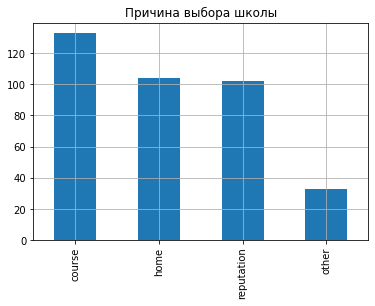

In [1588]:
stud.reason.value_counts().plot(kind = 'bar', 
                              grid = True, 
                              title = 'Причина выбора школы')

4 уникальных значения. Ошибок, выбросов нет. 17 нулевых строк. Самый часто встречающийся параметр: причина выбора школы - образовательная программа

In [1589]:
stud.loc[:, ['guardian']].info()
pd.DataFrame(stud.guardian.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  361 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


,guardian
mother,249
father,85
other,27


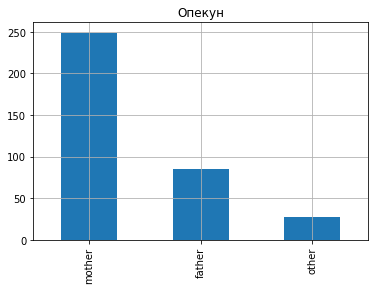

In [1590]:
stud.guardian.value_counts().plot(kind = 'bar', 
                              grid = True, 
                              title = 'Опекун')

3 уникальных значения. Ошибок, выбросов нет. 28 нулевых строк. Самый часто встречающийся параметр: Опекун - мать

In [1591]:
stud.loc[:, ['traveltime']].info()
pd.DataFrame(stud.traveltime.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  361 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


,traveltime
1.0,238
2.0,95
3.0,21
4.0,7


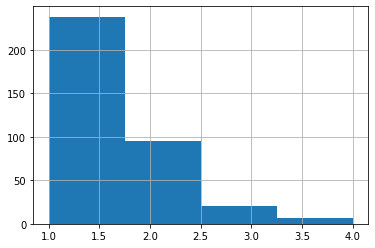

In [1592]:
stud.traveltime.hist(bins = 4)

4 уникальных значения. Ошибок, выбросов нет. 28 нулевых строк. Самый часто встречающийся параметр: 1 - время в пути  менее 15 мин

In [1593]:
stud.loc[:, ['studytime']].info()
pd.DataFrame(stud.studytime.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  382 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


,studytime
2.0,193
1.0,100
3.0,62
4.0,27


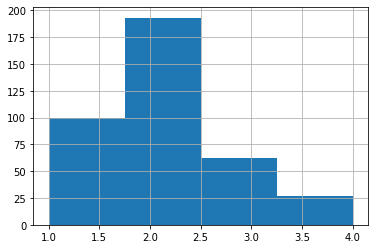

In [1594]:
stud.studytime.hist(bins = 4)

4 уникальных значения. Ошибок, выбросов нет. 7 нулевых строк. Самый часто встречающийся параметр: время на учёбу помимо школы в неделю - 2 - 2-5 часов

In [1595]:
stud.loc[:, ['failures']].info()
pd.DataFrame(stud.failures.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  367 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


,failures
0.0,291
1.0,49
2.0,14
3.0,13


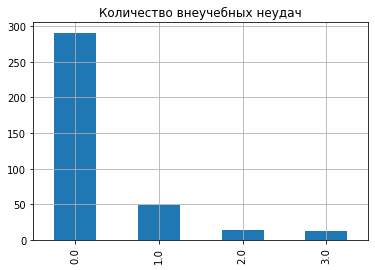

In [1596]:
stud.failures.value_counts().plot(kind = 'bar', 
                              grid = True, 
                              title = 'Количество внеучебных неудач')

4 уникальных значения. Ошибок, выбросов нет. 22 нулевые строки. Самый часто встречающийся параметр: нет внеучебных неудач

In [1597]:
stud.loc[:, ['schoolsup']].info()
pd.DataFrame(stud.schoolsup.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  381 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


,schoolsup
no,330
yes,51


2 уникальных значения. Ошибок, выбросов нет. 8 нулевых строк. Самый часто встречающийся параметр: не было дополнительной образовательной поддержки 

In [1598]:
stud.loc[:, ['famsup']].info()
pd.DataFrame(stud.famsup.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  350 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


,famsup
yes,216
no,134


2 уникальных значения. Ошибок, выбросов нет. 39 нулевых строк. Самый часто встречающийся параметр: была семейная образовательная поддержка

In [1599]:
stud.loc[:, ['paid']].info()
pd.DataFrame(stud.paid.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    349 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


,paid
no,196
yes,153


2 уникальных значения. Ошибок, выбросов нет. 40 нулевых строк. Самый часто встречающийся параметр: не было дополнительных платных занятий по математике

In [1600]:
stud.loc[:, ['activities']].info()
pd.DataFrame(stud.activities.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  375 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


,activities
yes,193
no,182


2 уникальных значения. Ошибок, выбросов нет. 14 нулевых строк. Самый часто встречающийся параметр: были дополнительные внеучебные занятия

In [1601]:
stud.loc[:, ['nursery']].info()
pd.DataFrame(stud.nursery.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  373 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


,nursery
yes,297
no,76


2 уникальных значения. Ошибок, выбросов нет. 16 нулевых строк. Самый часто встречающийся параметр: посещал детский сад

In [1602]:
stud.loc[:, ['studytime, granular']].info()
pd.DataFrame(stud['studytime, granular'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studytime, granular  382 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


,"studytime, granular"
-6.0,193
-3.0,100
-9.0,62
-12.0,27


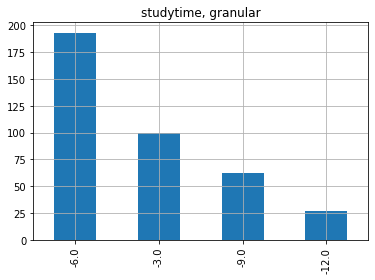

In [1603]:
stud['studytime, granular'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              title = 'studytime, granular')

4 уникальных значения. Ошибок, выбросов нет. 22 нулевые строки. Самый часто встречающийся параметр: -6.0

In [1604]:
stud.loc[:, ['higher']].info()
pd.DataFrame(stud.higher.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  370 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


,higher
yes,352
no,18


2 уникальных значения. Ошибок, выбросов нет. 19 нулевых строк. Самый часто встречающийся параметр: хочет получить высшее образование

In [1605]:
stud.loc[:, ['internet']].info()
pd.DataFrame(stud.internet.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  355 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


,internet
yes,302
no,53


2 уникальных значения. Ошибок, выбросов нет. 34 нулевые строки. Самый часто встречающийся параметр: есть интернет дома

In [1606]:
stud.loc[:, ['romantic']].info()
pd.DataFrame(stud.romantic.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  358 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


,romantic
no,236
yes,122


2 уникальных значения. Ошибок, выбросов нет. 31 нулевая строка. Самый часто встречающийся параметр: не состоит в романтических отношениях

In [1607]:
stud.loc[:, ['famrel']].info()
pd.DataFrame(stud.famrel.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  362 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


,famrel
4.0,182
5.0,93
3.0,62
2.0,17
1.0,7
-1.0,1


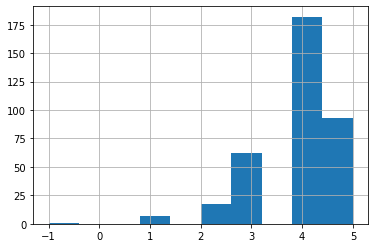

In [1608]:
stud.famrel.hist(bins = 10)

6 уникальных значений. Есть выброс. Так как параметр может принимать значения от 1 до 5, это явно ошибка. Можно либо удалить параметр в этой строчке, либо удалить всю строчку. Лучше удалить всю строчку, так как она всего одна и может содержать другие ошибки.

In [1610]:
stud.drop(stud[stud.famrel < 1].index, inplace = True)

In [1611]:
stud.loc[:, ['famrel']].info()
pd.DataFrame(stud.famrel.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  361 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


,famrel
4.0,182
5.0,93
3.0,62
2.0,17
1.0,7


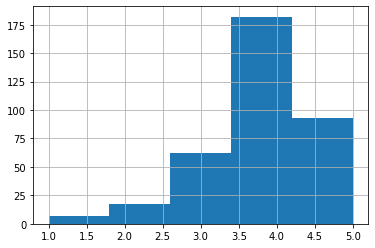

In [1612]:
stud.famrel.hist(bins = 5)

5 уникальных значения. Ошибок, выбросов нет. 27 нулевых строк. Самый часто встречающийся параметр: 4 - семейные отношения - хорошо

In [1613]:
stud.loc[:, ['freetime']].info()
pd.DataFrame(stud.freetime.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  377 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


,freetime
3.0,153
4.0,110
2.0,61
5.0,35
1.0,18


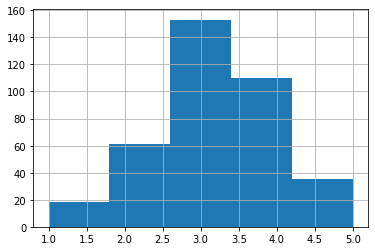

In [1614]:
stud.freetime.hist(bins = 5)

5 уникальных значения. Ошибок, выбросов нет. 11 нулевых строк. Самый часто встречающийся параметр: 3 - свободного времени - средне

In [1615]:
stud.loc[:, ['goout']].info()
pd.DataFrame(stud.goout.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   380 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


,goout
3.0,124
2.0,99
4.0,83
5.0,51
1.0,23


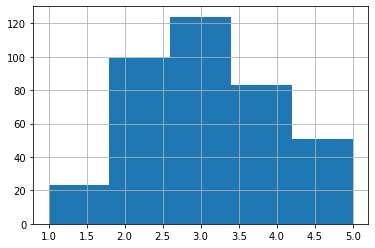

In [1616]:
stud.goout.hist(bins = 5)

5 уникальных значения. Ошибок, выбросов нет. 8 нулевых строк. Самый часто встречающийся параметр: 3 - времени проведенного с друзьями - средне

In [1617]:
stud.loc[:, ['health']].info()
pd.DataFrame(stud.health.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  373 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


,health
5.0,136
3.0,87
4.0,61
1.0,46
2.0,43


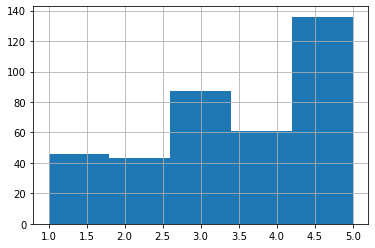

In [1618]:
stud.health.hist(bins = 5)

5 уникальных значения. Ошибок, выбросов нет. 5 нулевых строк. Самый часто встречающийся параметр: 5 - текущее состояние здоровья очень хорошее

In [1619]:
stud.loc[:, ['absences']].info()
pd.DataFrame(stud.absences.value_counts()).count()
pd.DataFrame(stud.absences.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  376 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


,absences
0.0,110
2.0,60
4.0,51
6.0,31
8.0,21
10.0,17
12.0,12
14.0,11
3.0,7
16.0,6


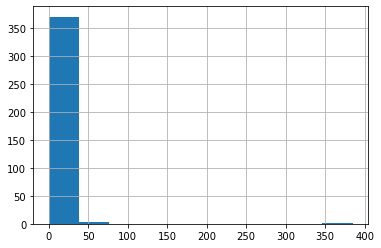

In [1620]:
stud.absences.hist()

35 уникальных значений. Есть выбросы. Мы не знаем ошибка это или нет. Можно либо удалить параметр в этой строчке, либо удалитьвсю строчку. Лучше удалить все строчки, так как они могут содержать другие ошибки.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


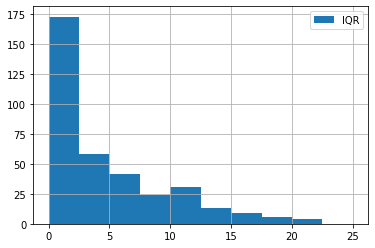

In [1621]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25) #Межквартильное расстояние
perc25 = stud.absences.quantile(0.25) #25% квартиля
perc75 = stud.absences.quantile(0.75) #75% квартиля
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 25), label = 'IQR')
 #Гичтограмма распределения без выбросов
plt.legend();

Удалим выбросы

In [1622]:
stud.drop(stud[stud.absences > (perc75 + 1.5*IQR)].index, inplace = True)
#Нижняя граница выброса отрицателная, можно не фильтровать по ней, так как отрицательных значений нет

In [1623]:
stud.loc[:, ['absences']].info()
display(pd.DataFrame(stud.absences.value_counts()).count())
pd.DataFrame(stud.absences.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  360 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB


absences    21
dtype: int64

,absences
0.0,110
2.0,60
4.0,51
6.0,31
8.0,21
10.0,17
12.0,12
14.0,11
3.0,7
16.0,6


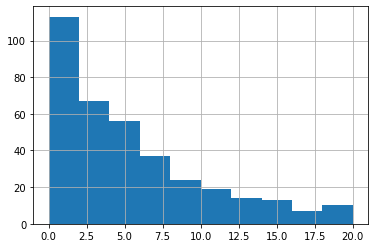

In [1624]:
stud.absences.hist()

21 уникальное значение. Нет выбросов и ошибок. 12 нулевых строк. Самый часто встречающийся параметр: 0 - нет пропущенных занятий

In [1625]:
stud.loc[:, ['score']].info()
display(pd.DataFrame(stud.score.value_counts()).count())
pd.DataFrame(stud.score.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   366 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB


score    17
dtype: int64

,score
50.0,54
55.0,42
0.0,37
75.0,32
65.0,30
60.0,30
70.0,27
40.0,26
45.0,23
80.0,16


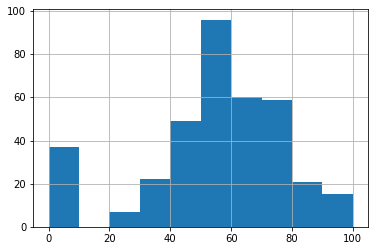

In [1626]:
stud.score.hist()

17 уникальноых значений. Есть разрыв после значения ноль, можно предположить , что это те кто не сдавали экзамен. Проведем анализ. 

25-й перцентиль: 41.25, 75-й перцентиль: 70.0, IQR: 28.75,  Границы выбросов: [-1.875, 113.125].


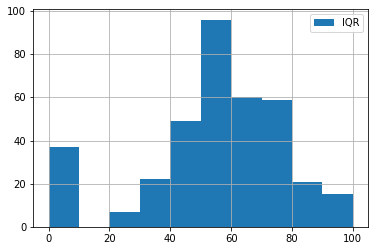

In [1627]:
#Проверим, есть ли другие выбросы
IQR = stud.score.quantile(0.75) - stud.score.quantile(0.25) #Межквартильное расстояние
perc25 = stud.score.quantile(0.25) #25% квартиля
perc75 = stud.score.quantile(0.75) #75% квартиля
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.score.loc[stud.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 100), label = 'IQR')
 #Гичтограмма распределения без выбросов
plt.legend();

Ноль попадает интервал оценок. Проведем анализ влияния на оценки сначала с полными данными. После чего проведем анализ удалив строки где оценка 0 и сравним результат двух анализов между собой

Удалим пустые ячейки, так как на этих данных будем проводить анализ и обучение модели и они не должны содержать пустые значения

In [1628]:
stud.drop(stud.score[pd.isnull(stud.score)].index, inplace = True)

In [1629]:
stud.loc[:, ['score']].info()
display(pd.DataFrame(stud.score.value_counts()).count())
pd.DataFrame(stud.score.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


score    17
dtype: int64

,score
50.0,54
55.0,42
0.0,37
75.0,32
65.0,30
60.0,30
70.0,27
40.0,26
45.0,23
80.0,16


## Корреляционный анализ

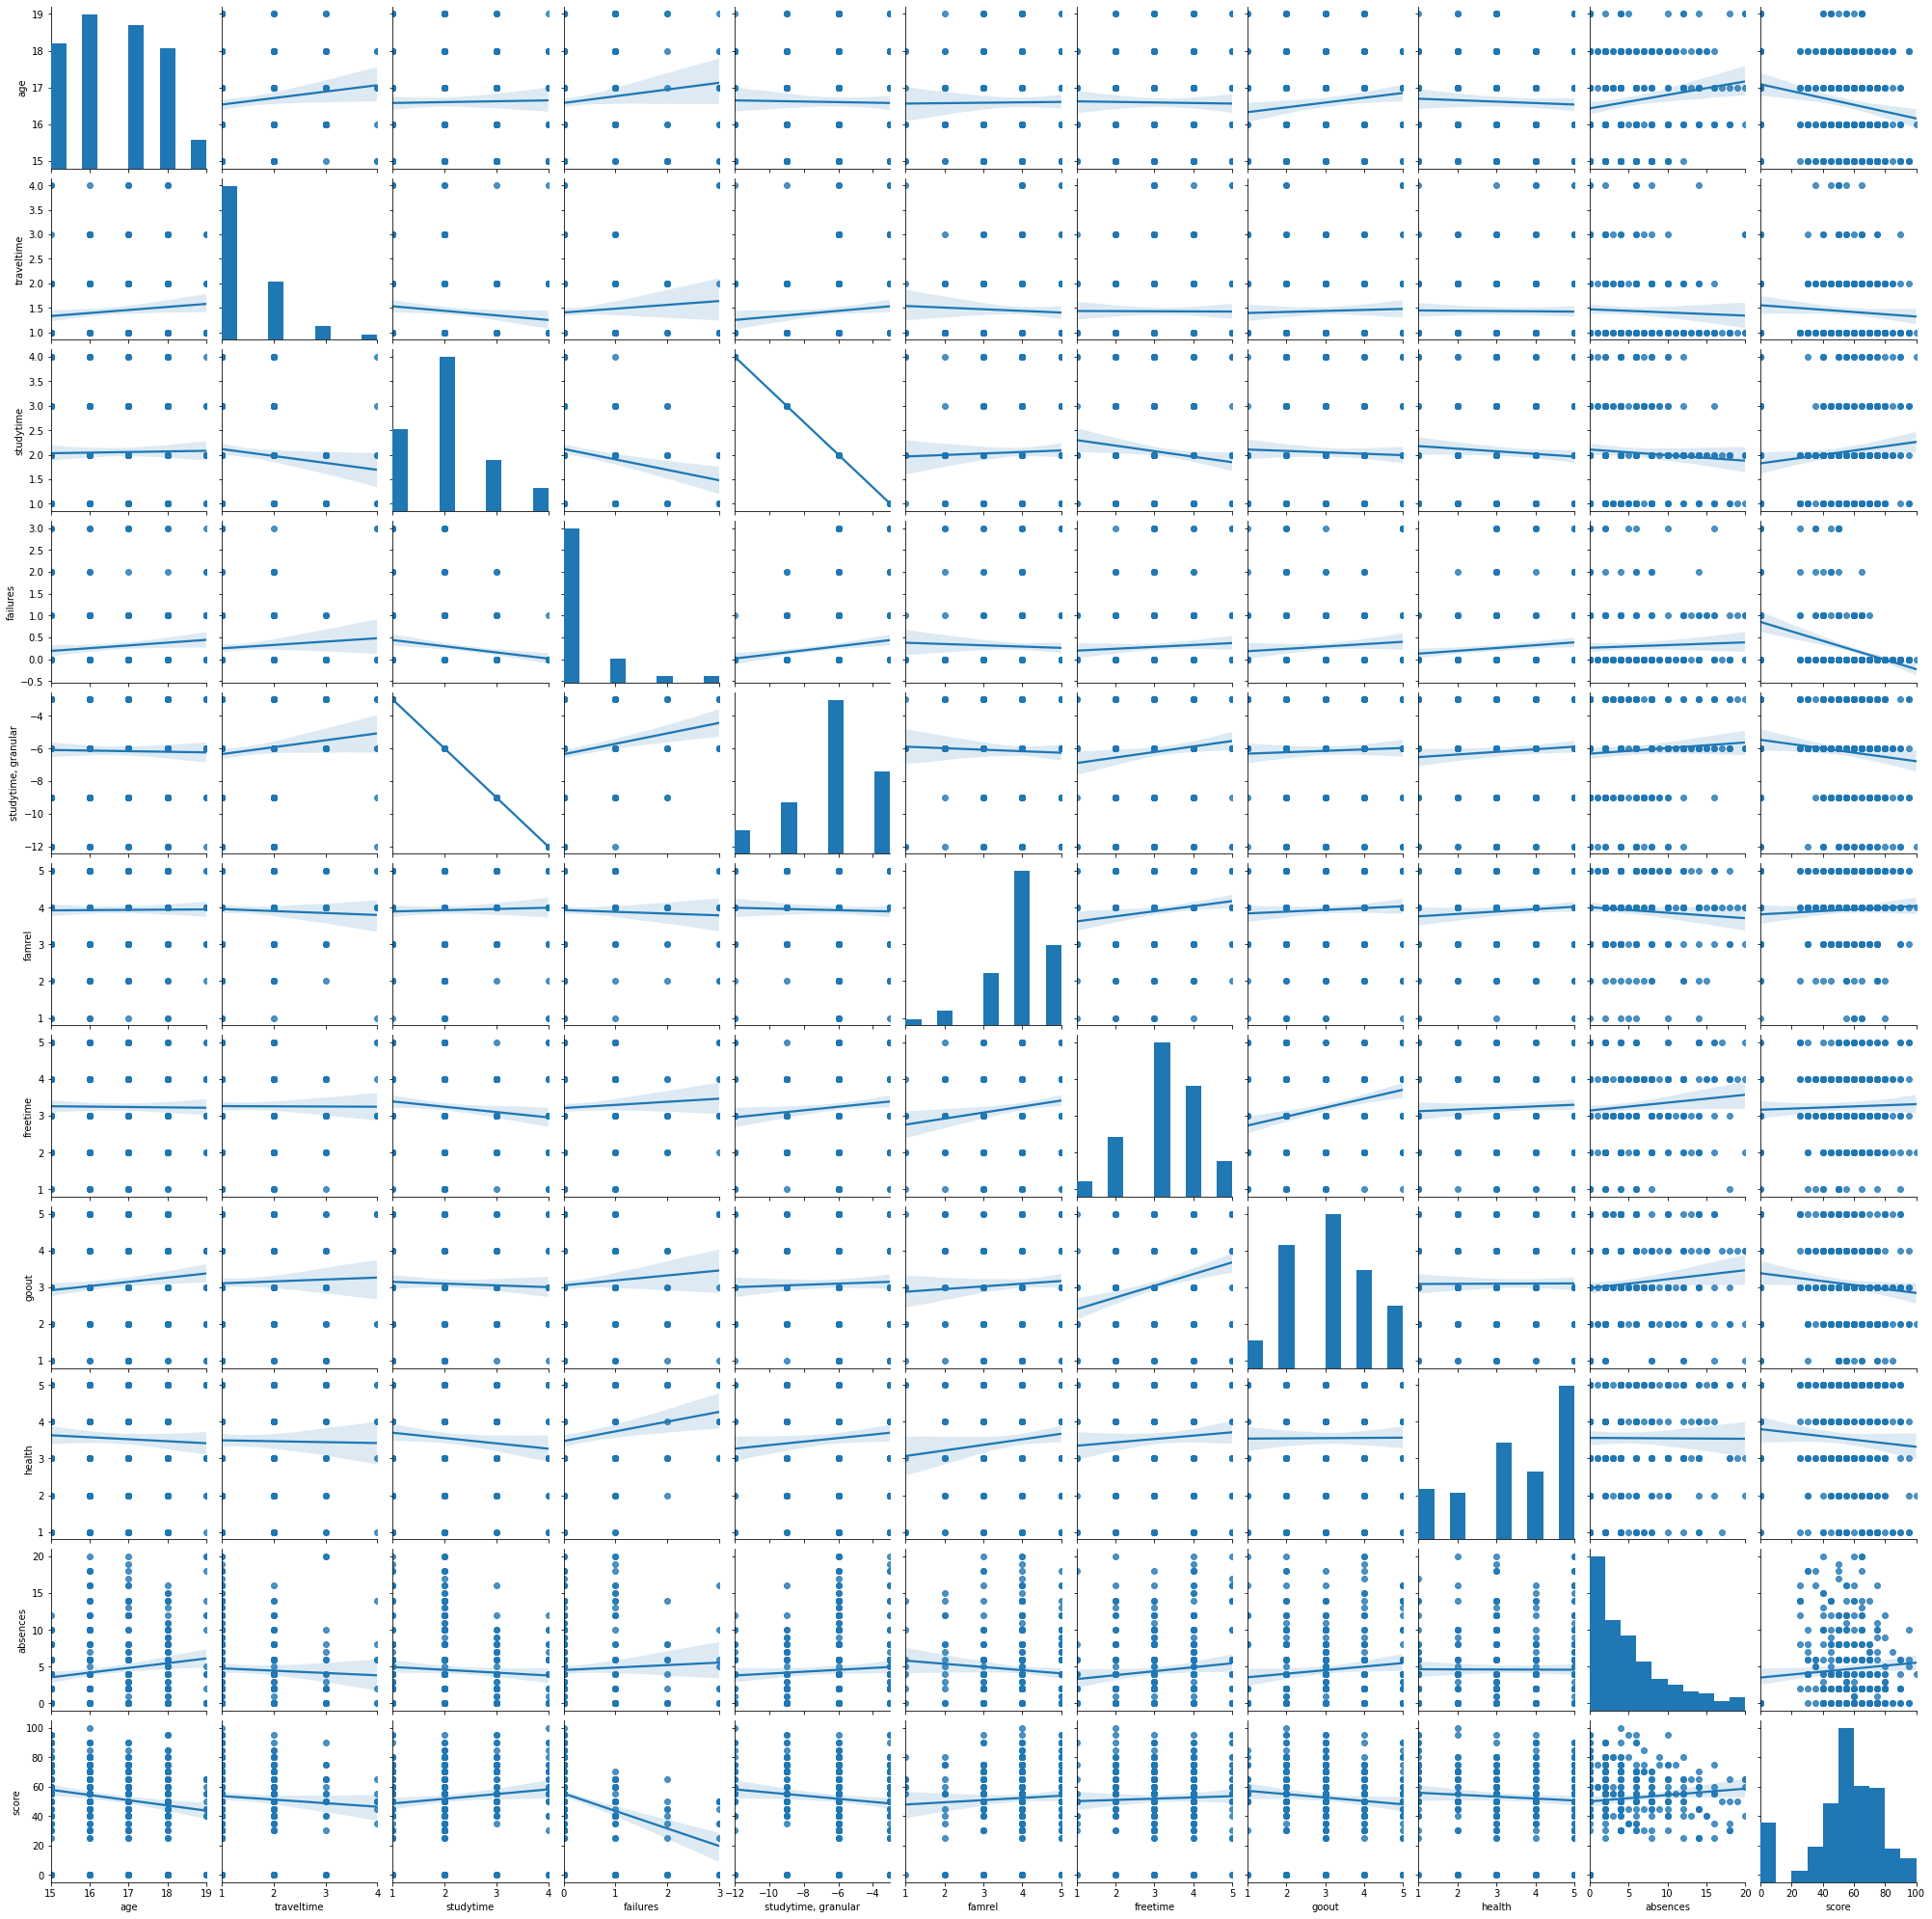

In [1630]:
sns.pairplot(stud, kind = 'reg')

In [1631]:
stud.corr()

,age,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,0.104394,0.017076,0.107677,-0.017076,0.008597,-0.012629,0.122054,-0.046160,0.153553,-0.181578
traveltime,0.104394,1.000000,-0.114637,0.077442,0.114637,-0.042381,-0.004055,0.032889,-0.012181,-0.045157,-0.074656
studytime,0.017076,-0.114637,1.000000,-0.173436,-1.000000,0.032203,-0.127589,-0.037354,-0.087486,-0.066294,0.118255
failures,0.107677,0.077442,-0.173436,1.000000,0.173436,-0.037514,0.060432,0.085229,0.130718,0.045784,-0.358621
"studytime, granular",-0.017076,0.114637,-1.000000,0.173436,1.000000,-0.032203,0.127589,0.037354,0.087486,0.066294,-0.118255
famrel,0.008597,-0.042381,0.032203,-0.037514,-0.032203,1.000000,0.150258,0.059450,0.099154,-0.080553,0.058454
freetime,-0.012629,-0.004055,-0.127589,0.060432,0.127589,0.150258,1.000000,0.278519,0.063247,0.107388,0.035836
goout,0.122054,0.032889,-0.037354,0.085229,0.037354,0.059450,0.278519,1.000000,0.005060,0.108707,-0.111050
health,-0.046160,-0.012181,-0.087486,0.130718,0.087486,0.099154,0.063247,0.005060,1.000000,-0.004457,-0.079360
absences,0.153553,-0.045157,-0.066294,0.045784,0.066294,-0.080553,0.107388,0.108707,-0.004457,1.000000,0.093247


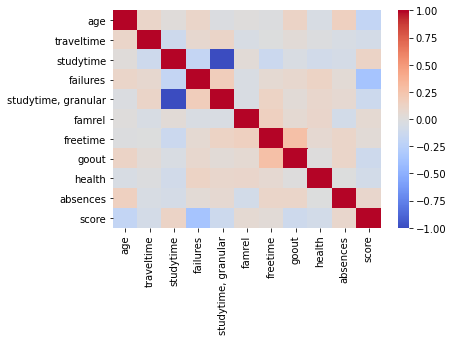

In [1632]:
sns.heatmap(stud.corr(), cmap = 'coolwarm')

Так как переменные studytime и studytime, granular полностью отрицательно скоррелированы , одну переменную можно исключить. Пусть это будет переменная studytime, granular.

Есть как положительно так и отрицательно скоррелированые с оценкой за экзамен переменные

Положительно среднескоррелированые переменные:

1. время на учёбу помимо школы в неделю - чем больше ученик тратит на учебу помимо школы, тем лучше у него оценки

Слабоскоррелированные положительно переменные в порядке уменьшении корреляции:

1. количество пропущенных занятий - чем больше пропущенных занятий тем выше оценки
2. семейные отношения - чем лучше отношения в семье, тем выше оценки
3. свободное время после школы - чем больше свободного времени  тем выше оценки

Мы получили странную зависимость оценки от количества прогуленных занятий. Возможно это произошло из-за включения в анализ учеников получивших ноль за экзамен (мы предположили, что они не сдавали экзамен)

In [1633]:
stud.absences[stud.score == 0].value_counts()

0.0    36
Name: absences, dtype: int64

Действительно мы видим, что информации по прогулам у учеников которые сдали на ноль нет. По этому лучше исключить из анализа учеников сдавших экзамен на ноль

In [1634]:
stud.drop(stud[stud.score == 0].index, inplace = True)

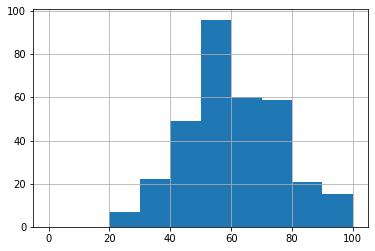

In [1635]:
stud.score.hist(bins = 10, range = (0, 100), label = 'IQR')

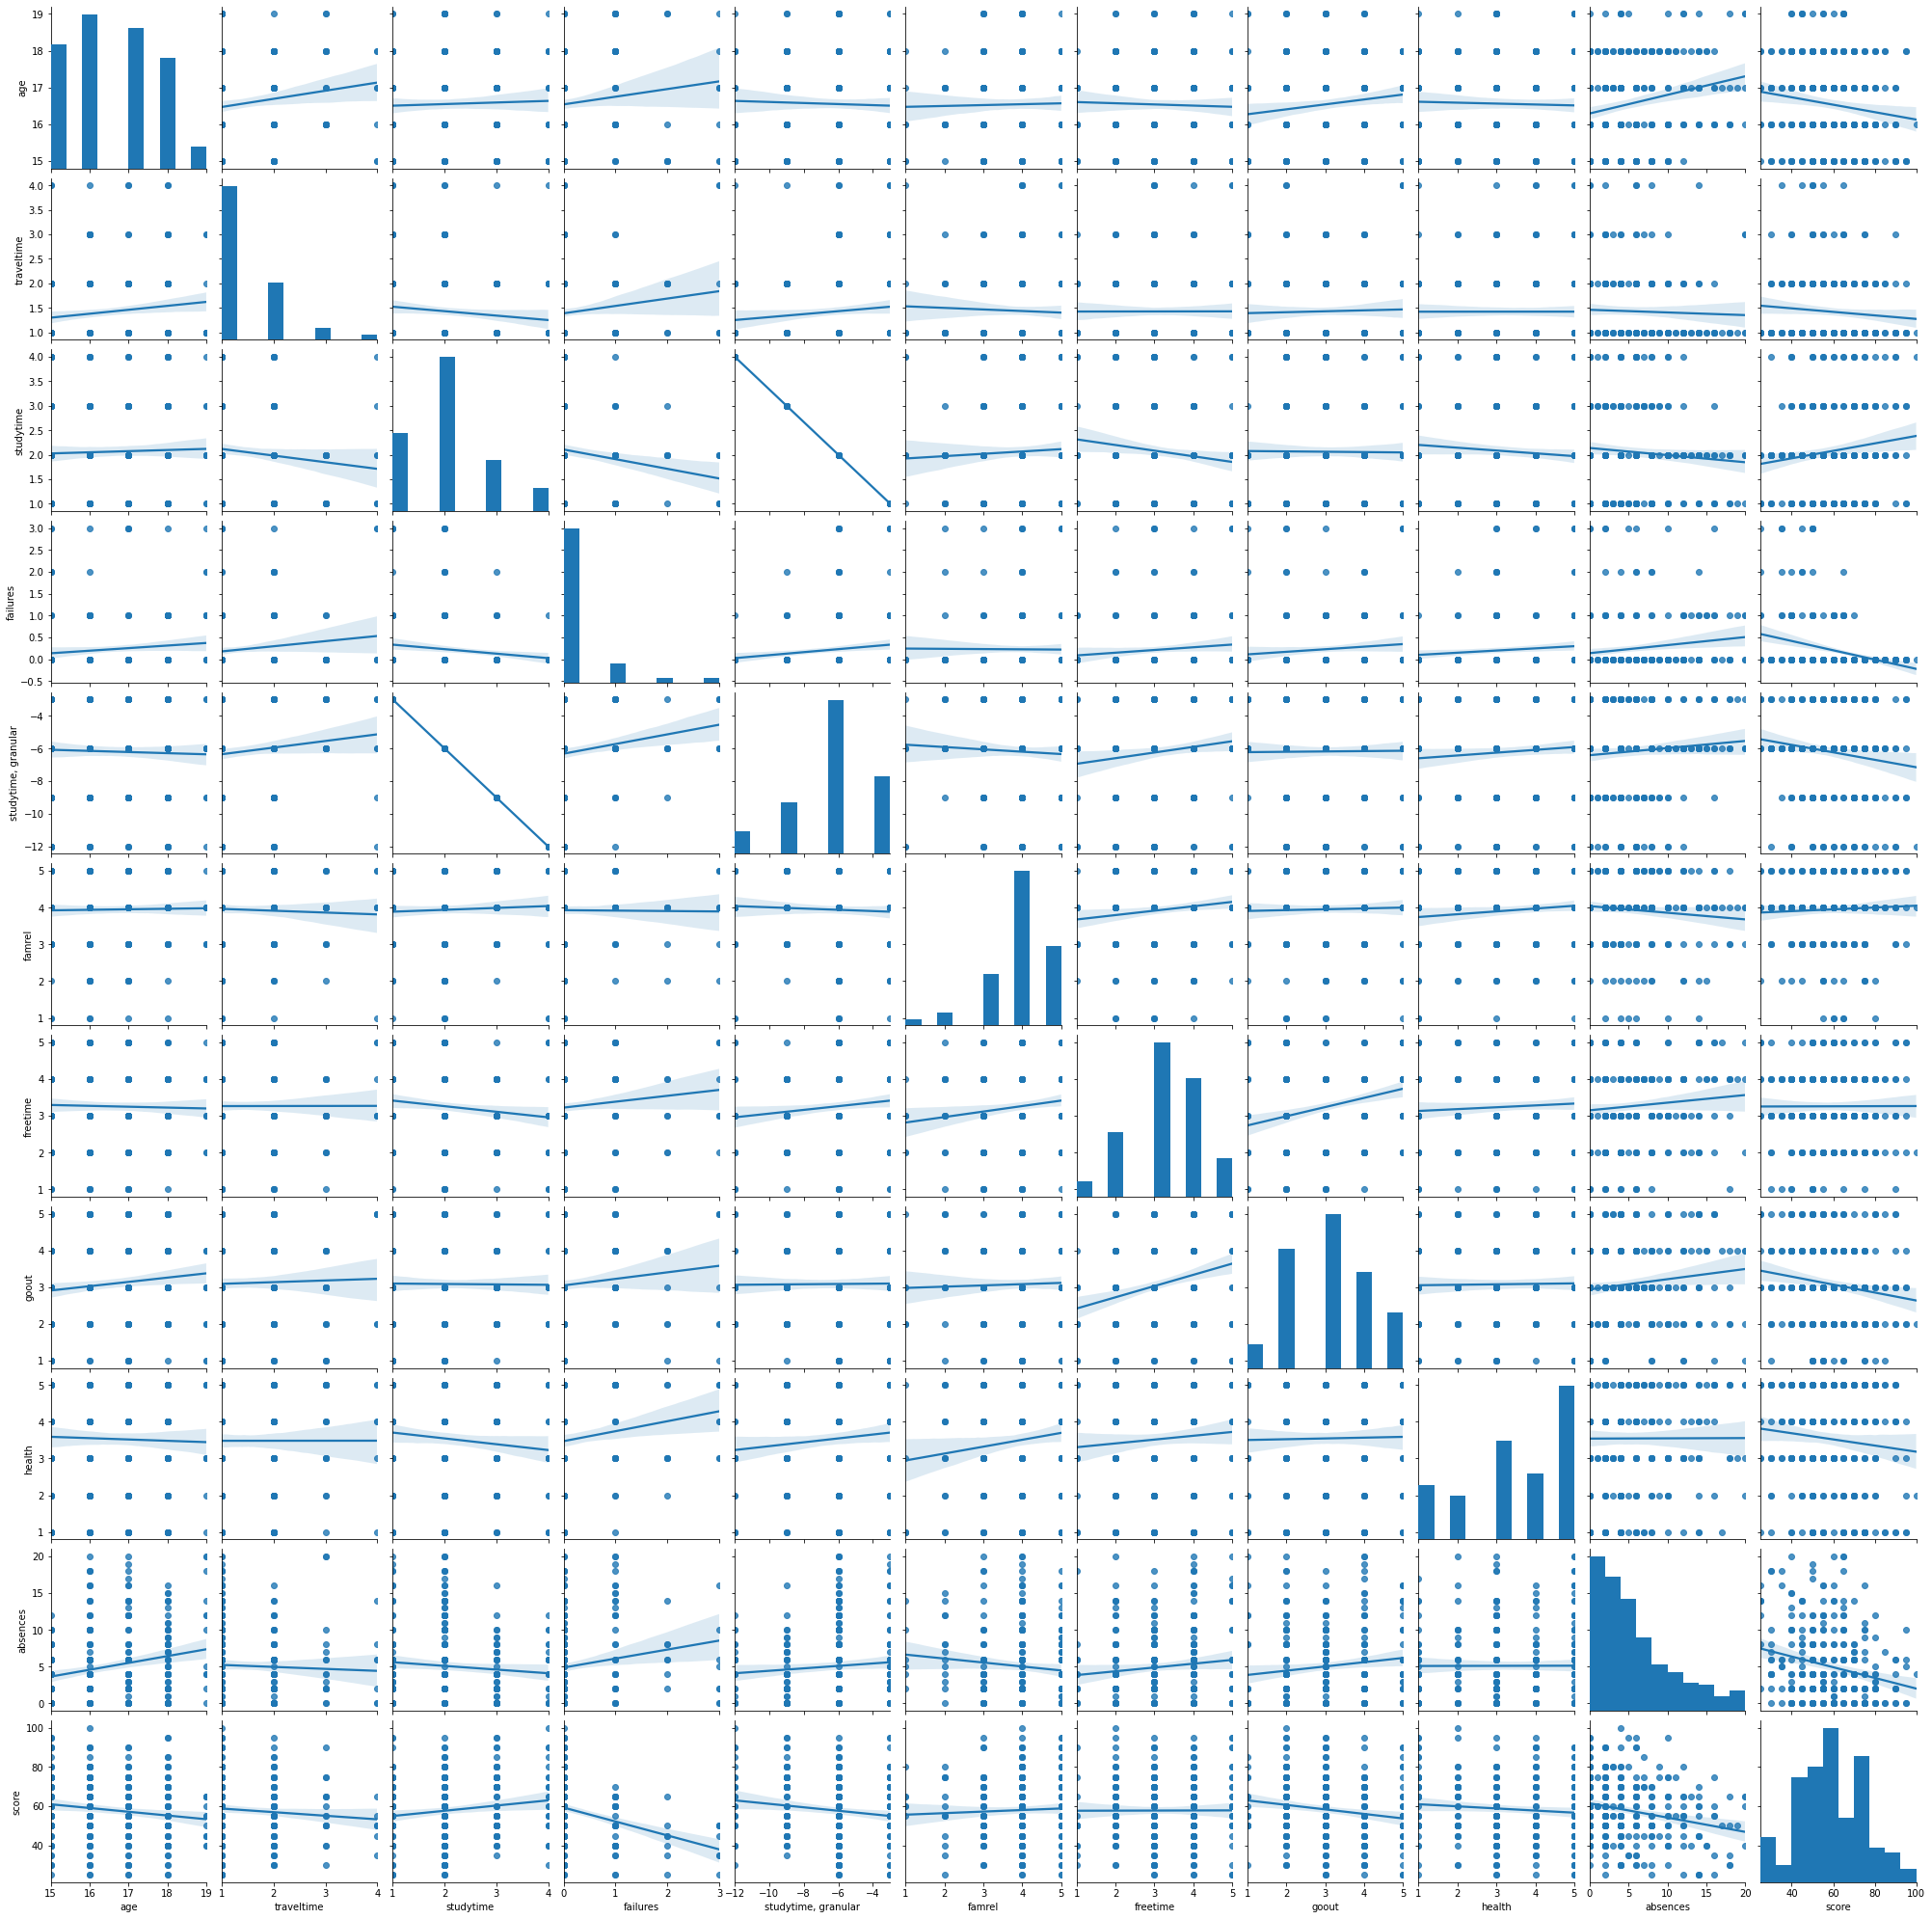

In [1636]:
sns.pairplot(stud, kind = 'reg')

In [1637]:
stud.corr()

,age,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,0.133437,0.031777,0.110784,-0.031777,0.018488,-0.027550,0.125003,-0.030011,0.216794,-0.138731
traveltime,0.133437,1.000000,-0.110819,0.132977,0.110819,-0.040069,0.001443,0.029436,0.000379,-0.038259,-0.081219
studytime,0.031777,-0.110819,1.000000,-0.142369,-1.000000,0.049517,-0.132148,-0.009012,-0.095133,-0.085381,0.142225
failures,0.110784,0.132977,-0.142369,1.000000,0.142369,-0.008203,0.099820,0.102293,0.116052,0.150026,-0.274869
"studytime, granular",-0.031777,0.110819,-1.000000,0.142369,1.000000,-0.049517,0.132148,0.009012,0.095133,0.085381,-0.142225
famrel,0.018488,-0.040069,0.049517,-0.008203,-0.049517,1.000000,0.133626,0.028065,0.119881,-0.098613,0.044239
freetime,-0.027550,0.001443,-0.132148,0.099820,0.132148,0.133626,1.000000,0.276173,0.072142,0.103558,0.002737
goout,0.125003,0.029436,-0.009012,0.102293,0.009012,0.028065,0.276173,1.000000,0.016469,0.126455,-0.157802
health,-0.030011,0.000379,-0.095133,0.116052,0.095133,0.119881,0.072142,0.016469,1.000000,0.002498,-0.094963
absences,0.216794,-0.038259,-0.085381,0.150026,0.085381,-0.098613,0.103558,0.126455,0.002498,1.000000,-0.229968


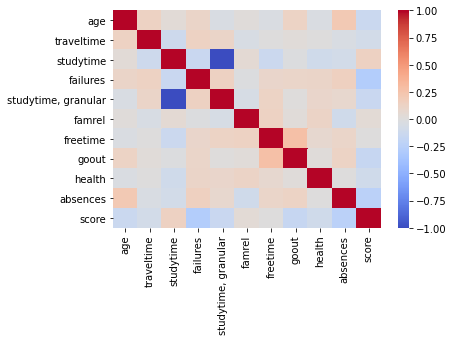

In [1638]:
sns.heatmap(stud.corr(), cmap = 'coolwarm')

Есть как положительно так и отрицательно скоррелированые с оценкой за экзамен переменные. 
Теперь мы видим, что прогулы отрицательно скоррелированы с оценкой, что является более логичным

Среднескоррелированые положительно переменные:
    
1. время на учёбу помимо школы в неделю - чем больше ученик тратит на учебу помимо школы, тем лучше у него оценки 

Слабоскоррелированные положительно переменные:

1. семейные отношения - чем лучше отношения в семье, тем выше оценки

Очень слабоскоррелированные положительно переменные:

2. свободное время после школы - чем больше свободного времени тем выше оценки

Среднескоррелированые отрицательно переменные в порядке уменьшении корреляции:

1. количество внеучебных неудач - чем их больше, тем хуже оценки
2. количество пропущенных занятий - чем больше пропущенных занятий тем ниже оценки
2. проведение времени с друзьями - чем больше проведено время с друзьями тем хуже оценки
3. возраст ученика - чем старше ученик, тем хуже оценки

Слабоскоррелированные положительные переменные в порядке уменьшении корреляции:

1. текущее состояние здоровья - чем лучше здоровье, тем хуже оценки (связано скороее всего с тем, что чем лучше здоровье, тем меньше тратит времени на учебу помимо школы, из анализа видим что они отрицательно скоррелированы)
2. время в пути до школы - чем больше времени тратит на дорогу, тем хуже оценки (причина скорее всего та же, что и у здоровья)

## Анализ номинативных переменных

In [1639]:
def get_boxplot14(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    
    studnull = stud.drop(stud[column][pd.isnull(stud[column])].index) # Удаляем пустые ячейки 
    
    sns.boxplot(x=column, y='score', 
                data=studnull.loc[studnull.loc[:, column].isin(studnull.loc[:, column].value_counts().index[:10])],
               ax=ax) # Строим график
    
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [1640]:
def get_boxplot7(column):
    fig, ax = plt.subplots(figsize = (7, 4))
    
    studnull = stud.drop(stud[column][pd.isnull(stud[column])].index) # Удаляем пустые ячейки 
    
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax) # Строим график
    
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

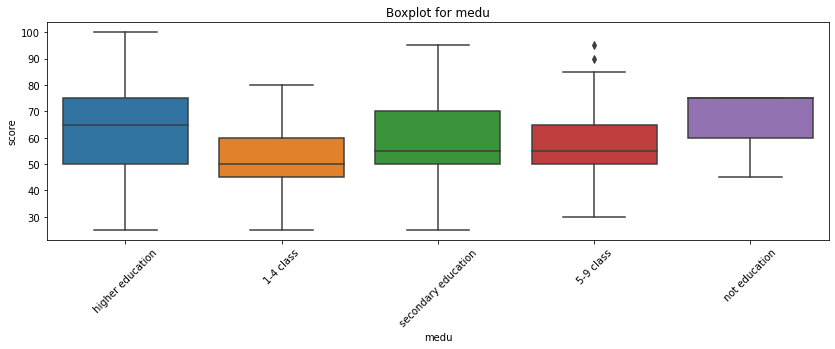

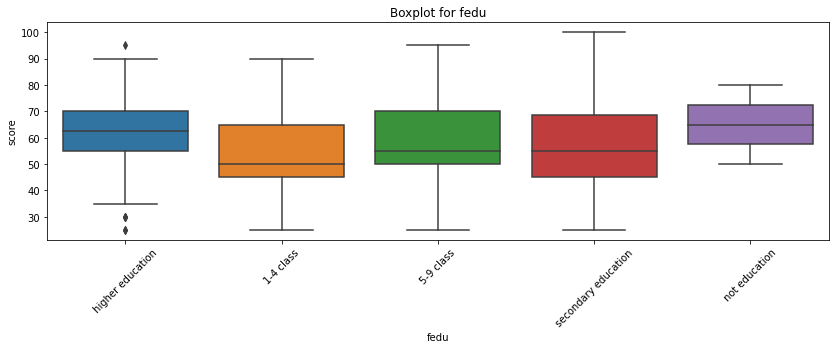

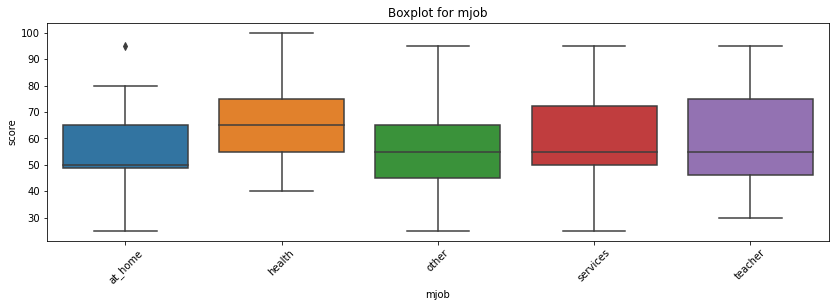

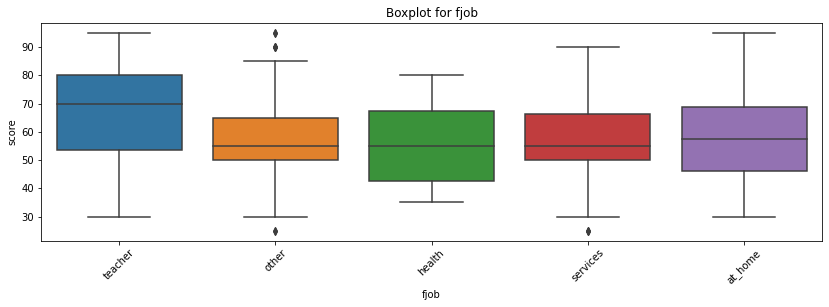

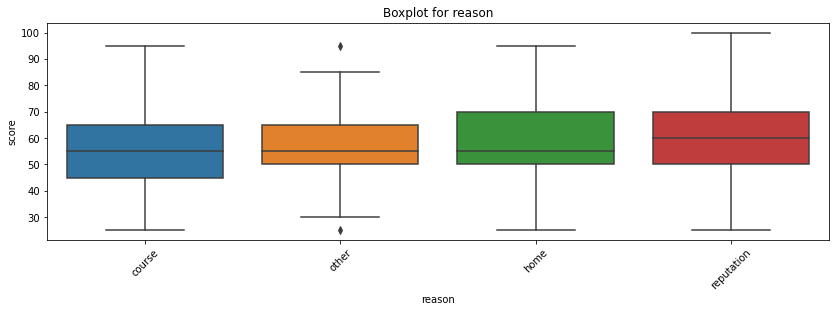

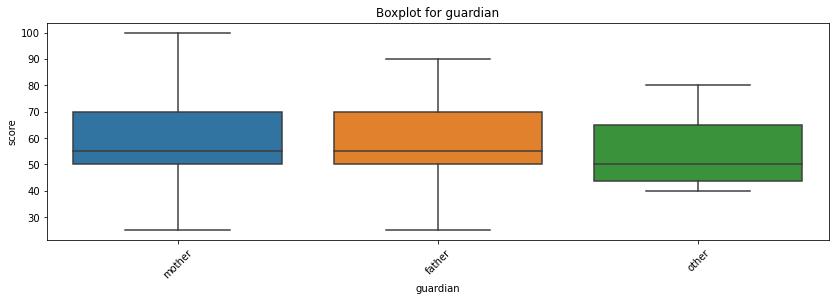

In [1641]:
for col in ['medu', 'fedu','mjob', 'fjob', 'reason', 'guardian']:
    get_boxplot14(col)

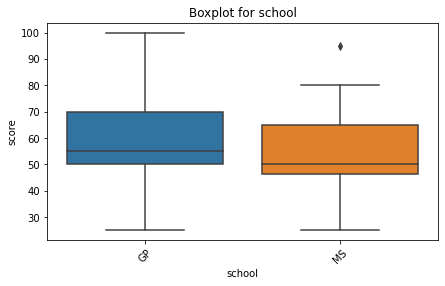

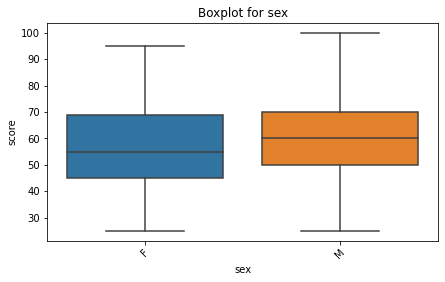

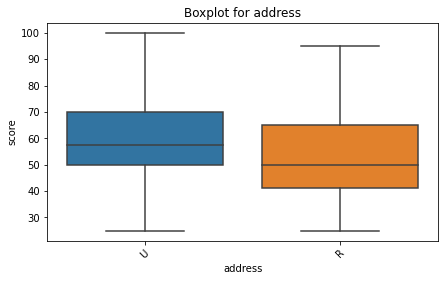

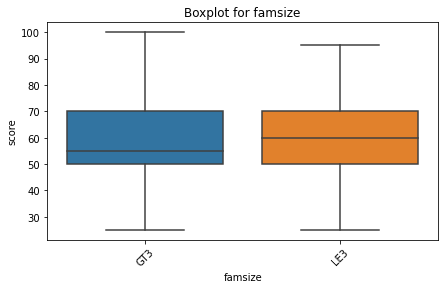

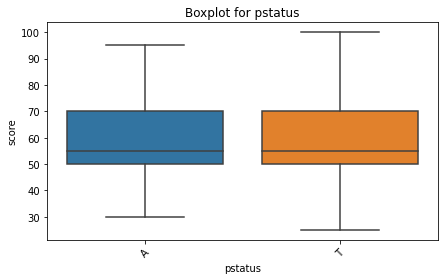

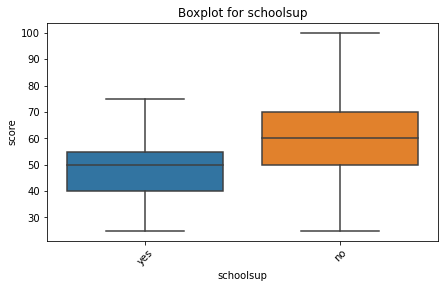

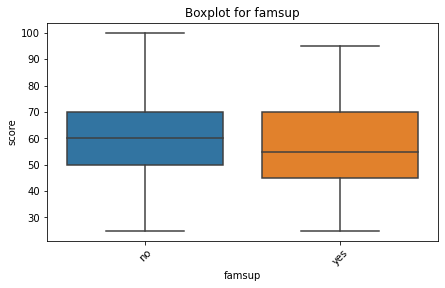

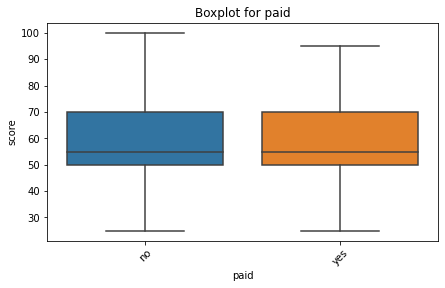

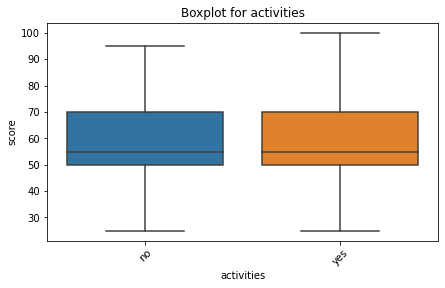

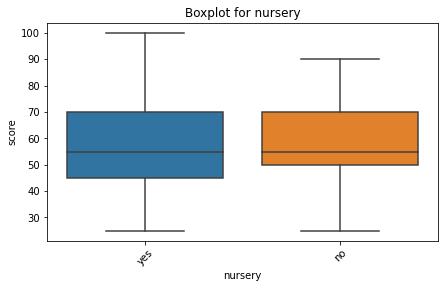

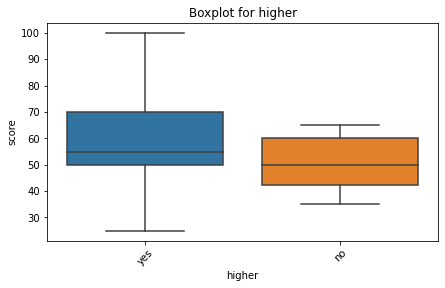

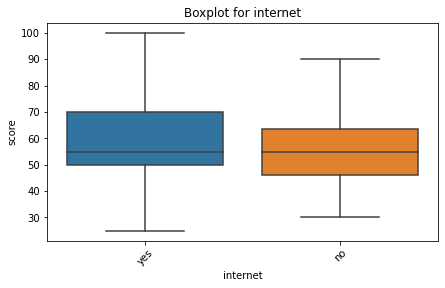

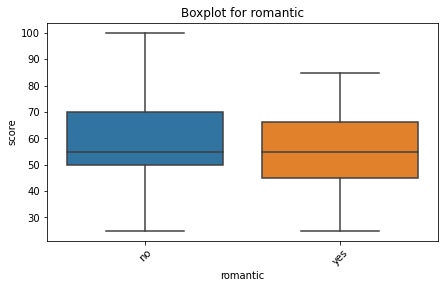

In [1642]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']:
    get_boxplot7(col)

По графикам похоже, что все параметры, кроме famsize - размер семьи, pstatus - совместно или несовместно живут родители,paid - есть или нет дополнительных платных занятий по математике, activities - есть или нет дополнительные внеучебные занятия, могут влиять на оценку на экзамене

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.

In [1643]:
def get_stat_dif(column):
    
    studnull = stud.drop(stud[column][pd.isnull(stud[column])].index) # Удаляем пустые ячейки из столбца column
        
    cols = studnull.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(studnull.loc[studnull.loc[:, column] == comb[0], 'score'], 
                        studnull.loc[studnull.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [1644]:
for col in ['medu', 'fedu','mjob', 'fjob', 'reason', 'guardian','school', 'sex', 'address', 'famsize', 'pstatus',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки fedu
Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки schoolsup


Как мы видим, серьёзно отличаются пять параметров: medu - образование матери,  fedu — образование отца, sex — пол ученика, address — тип адреса ученика - загородом живет или в городе, schoolsup — дополнительная образовательная поддержка. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: medu, fedu, sex, address, schoolsup, studytime, famrel, failures, absences, goout, age, health, traveltime.

In [1653]:
stud_for_model = stud.loc[:, ['medu', 'fedu', 'sex', 'address', 'schoolsup', 'studytime', 'famrel', 'failures', 'absences', 'goout', 'age', 'health', 'traveltime', 'score']]
stud_for_model.head()

,medu,fedu,sex,address,schoolsup,studytime,famrel,failures,absences,goout,age,health,traveltime,score
0,higher education,higher education,F,U,yes,2.0,4.0,0.0,6.0,4.0,18,3.0,2.0,30.0
1,1-4 class,1-4 class,F,U,no,2.0,5.0,0.0,4.0,3.0,17,3.0,1.0,30.0
2,1-4 class,1-4 class,F,U,yes,2.0,4.0,3.0,10.0,2.0,15,3.0,1.0,50.0
3,higher education,5-9 class,F,U,no,3.0,3.0,0.0,2.0,2.0,15,5.0,1.0,75.0
4,secondary education,secondary education,F,U,no,2.0,4.0,0.0,4.0,2.0,16,5.0,1.0,50.0


в результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике:

1. В данных достаточно мало пустых значений.
2. Выбросы найдены только в столбцах Образование отцов и Семейные отношения связанные с ошибкой введения и в столбце Пропущенные занятия, что позволяет сделать вывод о том, что данные достаточно чистые. Ошибок не много.
3. Есть Ученики имеющие ноль за экзамен. Их исключили из анализа, так как по таким ученикам не хватает данных и есть предположение, что эти ученики не сдавали экзамен.
4. Есть значительная корреляция оценки от времяни на учёбу помимо школы в неделю - чем больше ученик тратит на учебу помимо школы, тем лучше у него оценки.

Также есть значительная корреляция оценки и количества внеучебных неудач - чем их больше, тем хуже оценки. Возможно связано с тем, что те кто плохо учится испытывают проблемы с успехами и в не школы.

Также значительная корреляция оценки с количеством пропущенных занятий - чем больше пропущенных занятий тем ниже оценки, проведением времени с друзьями - чем больше проведено время с друзьями тем хуже оценки, возрастом ученика - чем старше ученик, тем хуже оценки
5. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это medu, fedu, sex, address, schoolsup, studytime, famrel, failures, absences, goout, age, health, traveltime.